In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Fish.csv")
print(df.head)



<bound method NDFrame.head of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>


In [3]:
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]  # independent features
y = df['Weight']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print(X_train)

     Length1  Length2  Length3   Height   Width
75      15.0     16.2     17.2   4.5924  2.6316
138     43.2     46.0     48.7   7.7920  4.8700
2       23.9     26.5     31.1  12.3778  4.6961
86      20.0     22.0     23.5   6.1100  3.4075
45      20.5     22.5     25.3   7.0334  3.8203
..       ...      ...      ...      ...     ...
71      24.0     26.0     29.0  11.3680  4.2340
106     25.9     28.0     29.4   7.8204  4.2042
14      29.4     32.0     37.2  14.9544  5.1708
92      20.5     22.5     24.0   6.7920  3.6240
102     25.2     27.3     28.7   8.3230  5.1373

[127 rows x 5 columns]


In [34]:
# Polynomial Transformation (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print(X_train_poly)

[[  1.          15.          16.2        ...  21.09013776  12.08535984
    6.92531856]
 [  1.          43.2         46.         ...  60.715264    37.94704
   23.7169    ]
 [  1.          23.9         26.5        ... 153.20993284  58.12738658
   22.05335521]
 ...
 [  1.          29.4         32.         ... 223.63407936  77.32621152
   26.73717264]
 [  1.          20.5         22.5        ...  46.131264    24.614208
   13.133376  ]
 [  1.          25.2         27.3        ...  69.272329    42.7577479
   26.39185129]]


In [28]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test_poly)


In [30]:
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9672675055786767
Mean Squared Error: 4655.846662850337


In [31]:
from sklearn.metrics import mean_absolute_error

# 📊 METRICS
# =======================
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Performance Metrics")
print("--------------------------")
print(f"R² Score : {r2:.3f}")
print(f"MAE      : {mae:.2f}")
print(f"MSE      : {mse:.2f}")
print(f"RMSE     : {rmse:.2f}")

Model Performance Metrics
--------------------------
R² Score : 0.967
MAE      : 47.04
MSE      : 4655.85
RMSE     : 68.23


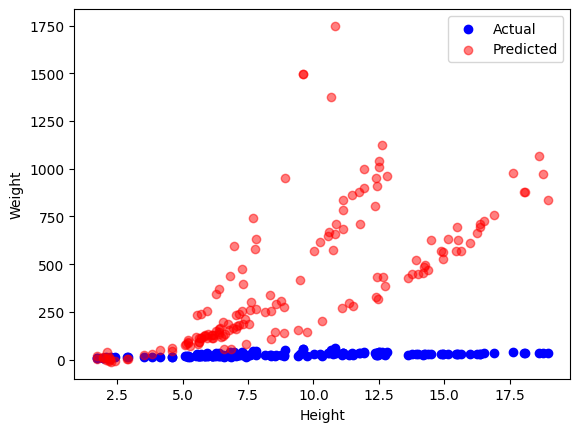

In [38]:
# Visualize Weight vs Length3 (example)
plt.scatter(df['Length1'], df['Length1'], color='blue', label='Actual')
plt.scatter(df['Length1'], model.predict(poly.transform(df[['Length1', 'Length2', 'Length3', 'Height', 'Width']])), color='red', label='Predicted', alpha=0.5)
plt.xlabel("He")
plt.ylabel("Weight")
plt.legend()
plt.show()

In [12]:
from google.colab import files
import pickle

# Save the trained model
with open('Fish_model.pkl', 'wb') as f:
  pickle.dump((poly, model), f)

# Download the saved model
files.download("Fish_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>